In [1]:
# Importujeme základní vykreslovací modul
import matplotlib.pyplot as plt 

# A samozřejmě numpy
import numpy as np

# Občas se hodí i matematika
import math

# Další typy 2D grafů

Zatím jsme pracovali pouze s metodou `plot` a kreslili jsme čárové grafy. Kromě čárových pak existuje ještě mnoho dalších typů grafu. Jejich kompletní výčet najdete v [galerii](https://matplotlib.org/2.0.2/gallery.html). Uvádíme některé z nich pro ukázku:

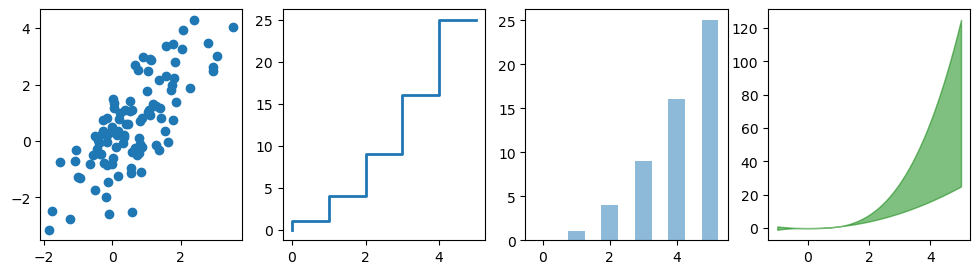

In [4]:
import numpy.random as random

x = np.linspace(-1, 5, 50)
n = np.array([0,1,2,3,4,5])
xx = np.linspace(0, 1, 100) + random.randn(100)

fig, axes = plt.subplots(1, 4, figsize=(12,3))

# Bodový graf
axes[0].scatter(xx, xx + random.randn(len(xx)))

# Schodový graf
axes[1].step(n, n**2, lw=2)

# Sloupcový graf
axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

# Výplň mezi křivkami
axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)

## Histogram

(array([1.000e+00, 2.000e+00, 1.800e+01, 2.800e+01, 9.500e+01, 2.200e+02,
        4.650e+02, 7.680e+02, 1.116e+03, 1.383e+03, 1.570e+03, 1.479e+03,
        1.139e+03, 8.450e+02, 4.700e+02, 2.420e+02, 9.700e+01, 3.800e+01,
        1.600e+01, 8.000e+00]),
 array([-4.14877318, -3.75663692, -3.36450066, -2.97236439, -2.58022813,
        -2.18809187, -1.7959556 , -1.40381934, -1.01168308, -0.61954681,
        -0.22741055,  0.16472571,  0.55686198,  0.94899824,  1.3411345 ,
         1.73327077,  2.12540703,  2.51754329,  2.90967956,  3.30181582,
         3.69395208]),
 <BarContainer object of 20 artists>)

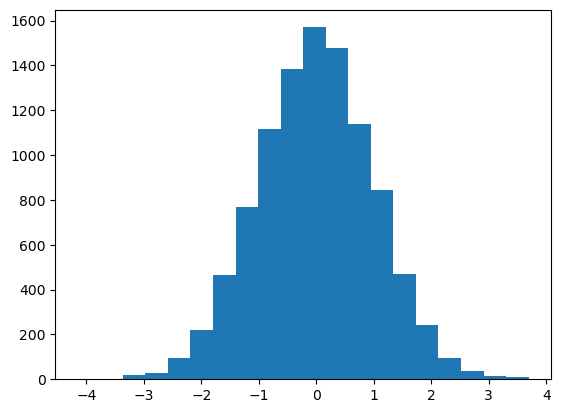

In [5]:
n = np.random.randn(10000)     # Spousta náhodných čísel (norm.rozdělení)
plt.hist(n, 20)                # Histogram o 20 "binech"

## Polární grafy

Můžeme samozřejmě vytvářet i polární grafy, stačí jen správně zadat argumenty metody `add_axes`:

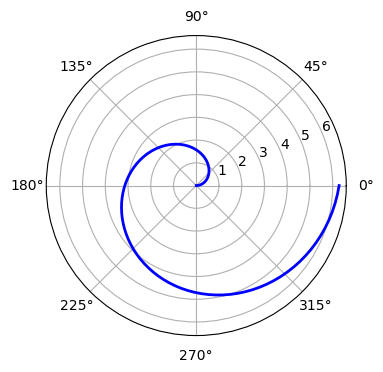

In [6]:
fig = plt.figure(figsize=(5,5))

# Polární souřadnice
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * math.pi, 100)

# Jednoduchá spirála
ax.plot(t, t, color='blue', lw=2)

## Dvourozměrná vizualizace dvoudimenzionálních dat

Pokud máme vizualizovat hodnoty závislé na hodnotách dvou parametrů, $z = f(x, y)$, můžeme buď hodnoty kódovat barevně, nebo pomocí obrysového grafu. Ukážeme si obojí.

In [7]:
# Náhodně zhůvěřilá funkce
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)
Z = ((np.sin((X + Y) ** 1.5) + 1.01) / 2) ** (np.cos(Y*3) + 1) + np.sin((X + Y) / 20)
Z = Z.T

## pcolor (barevné kódování hodnoty)
Parametr `cmap` určuje barevnou paletu, kterou se hodnoty kódují. Více barevných palet najdete v [dokumentaci](https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html).

Příkaz colorbar() vytvoří legendu pro barvu.

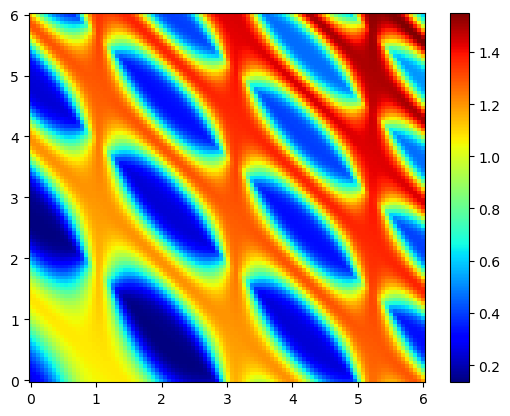

In [8]:
fig, ax = plt.subplots()

p = ax.pcolor(X, Y, Z, shading='auto', cmap="jet", vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

## imshow (obrazová data)

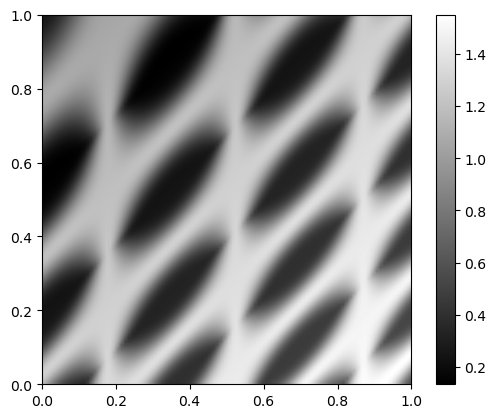

In [9]:
fig, ax = plt.subplots()

im = plt.imshow(Z, cmap="gray", vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

# Výběr interpolace = vyhlazování
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

## contour (obrysový graf)
Podrobnosti viz [dokumentace](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html).

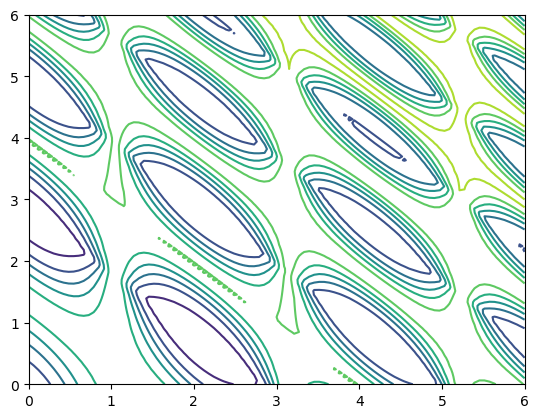

In [10]:
fig, ax = plt.subplots()
cnt = plt.contour(X, Y, Z)

# 3D grafy

Pro kreslení trojrozměrných grafů musíme nejdřív vytvořit trojrozměrnou soustavu souřadnic jako instanci třídy `Axes3D`. 3D grafy můžeme do obrázku vkládat stejně jako dvourozměrné, nejjednodušší je ale použít keyword argument `projection='3d'` u klasických metod `add_axes` a `add_subplot`.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

## Povrchové grafy

In [ ]:
fig = plt.figure(figsize=(14,6))

# `ax` je trojrozměrná osa (díky keyword argumentu projection)
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# Povrchový graf s doprovodnou barevnou informací
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="jet", linewidth=0, antialiased=True)
cb = fig.colorbar(p, shrink=0.5)

## Drátěný (wire-frame) graf

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

Více informací o trojrozměrných grafech najdete zde: [dokumentace](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html).

# Backendy

Matplotlib nabízí spoustu tzv. "backendů", které se starají o vytváření grafů v různých formátech (SVG, PNG, PDF, ...) a jejich zobrazování pomocí různých technologií (Qt, GTK, přímo v Jupyter Notebooku atp.). Některé jsou interaktivní, jiné ne, nebudeme si je ale ukazovat jeden po druhém.

Seznam všech podporovaných backendů v aktuální instalaci matplotlibu:

In [ ]:
import matplotlib
print(matplotlib.rcsetup.all_backends)

Ne vždy se hodí inline backend. Především pokud chceme s grafem interaktivně pracovat (zoom, posun apod.) použijeme např. Qt5 backend pomocí
```
%matplotlib qt5
```

In [ ]:
%matplotlib qt5


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), '-')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')


## Odkazy

* http://www.matplotlib.org - Hlavní stránka projektu
* http://matplotlib.org/gallery.html - Galerie se spoustou příkladů toho, co se v matplotlib dá udělat.
* http://www.loria.fr/~rougier/teaching/matplotlib - Dobrý tutoriál (v angličtině).

## Jak vylepšit (nebo také ne) vzhled grafů z Matplotlib

* https://matplotlib.org/tutorials/introductory/customizing.html
* https://github.com/mwaskom/seaborn

## Další knihovny pro práci s grafy

* **Plotly** - JavaScript knihovna s Python API a také online prostředím pro kreslení grafů: https://plot.ly/
* **Bokeh** - interaktivní grafy pomocí HTML + JS od Continuum Analytics, http://bokeh.pydata.org/
* **Holoviews** - vizualizace dat propojená s práci s daty samotnými.
* a další, přehled najdete na https://pyviz.org/